# Week 1 opdracht

## Datacleaning

De library seaborn wordt gebruikt om de waarden van de datasets te visualiseren
De library pandas wordt gebruikt om de dataset in te laden en eventueel te modificeren
De library matplotlib wordt vooral gebruikt om de labels van de grafiek in seaborn te veranderen

Er wordt bij elke modificattie van de dataset gekeken hoe de dataset is veranderd door middel van de functie **dataframe**.head() of **dataframe**.info()

In [3]:
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs
df = pd.read_csv('survey.csv')
df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


De steps dataset is een ander csv type die alles scheidt met  ; inplaats van "," . hierbij heb ik gekeken naar de documentatie van de pandas functie read_csv en gezien dat de functie "sep" automatisch staat op het scheiden op "," 

In [4]:
df2 = pd.read_csv('steps.csv', sep=";")
df2.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In de opdracht staat er om de twee datasets te combineren en een extra kolom te maken met de naam **steps per participant**. hierbij voeg ik eerst de kolom toe aan de steps dataset, aangezien dat makkelijker is dan het erna toe doen. Als ik de kolom na het samenvoegen toevoegt moet ik rekening houden met non-numerieke waarden.

In [5]:
df2["steps per participant"] = df2.mean(axis=1)
df2.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,steps per participant
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10144.048193
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5652.756098
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8246.033557
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3460.380952
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5215.636364


Combineren van beide datasets in 1 dataset. Ze worden samengecombineerd door de kolom **ID** 

In [6]:
df_merge = pd.merge(df, df2, on = 'id') #'app' is the common identifier
df_merge.info


<bound method DataFrame.info of       id         city  gender    age  hh_size  education          education_1  \
0      1     Bordeaux    Male  25-34        4          4  Master or doctorate   
1      2        Lille    Male  35-44        1          3             Bachelor   
2      3  Montpellier    Male  25-34        2          2  Master or doctorate   
3      4         Lyon    Male    <25        1          1             Bachelor   
4      5  Montpellier  Female  25-34        3          4             Bachelor   
..   ...          ...     ...    ...      ...        ...                  ...   
924  925        Lille  Female  45-54        3          4  Master or doctorate   
925  926        Lille    Male    <25        3          5             Bachelor   
926  927  Montpellier    Male  35-44        2          2             Bachelor   
927  928        Lille  Female  55-64        1          1          High school   
928  929         Lyon    Male  25-34        2          2          High school

Er wordt gefilterd op bepaalde punten
- Deelnemers die gemiddeld meer dan 13000 stappen hebben worden niet meegenomen
- Deelnemers die meer dan 100kg wegen worden niet meegenomen
- Deelnemers die langer dan 220 cm worden niet meegenomen

In [7]:
df_merge = df_merge[df_merge["steps per participant"]<13000 ]
df_merge = df_merge [df_merge["weight"]<100] 
df_merge = df_merge [df_merge["height"]<220]
df_merge.info

<bound method DataFrame.info of       id         city  gender    age  hh_size  education          education_1  \
0      1     Bordeaux    Male  25-34        4          4  Master or doctorate   
1      2        Lille    Male  35-44        1          3             Bachelor   
2      3  Montpellier    Male  25-34        2          2  Master or doctorate   
3      4         Lyon    Male    <25        1          1             Bachelor   
4      5  Montpellier  Female  25-34        3          4             Bachelor   
..   ...          ...     ...    ...      ...        ...                  ...   
922  923         Lyon    Male  35-44        2          2  Master or doctorate   
924  925        Lille  Female  45-54        3          4  Master or doctorate   
925  926        Lille    Male    <25        3          5             Bachelor   
926  927  Montpellier    Male  35-44        2          2             Bachelor   
928  929         Lyon    Male  25-34        2          2          High school

## Exploratory data analysis part 1

The median filesize is: 6016.8490566037735 MB
The mean filesize is: 6239.610218825027 MB


[]

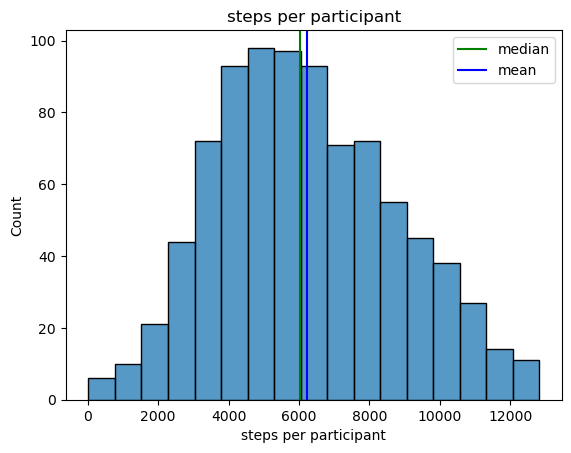

In [8]:
mean_steps = df_merge["steps per participant"].mean()
median_steps = df_merge["steps per participant"].median()

print(f'The median filesize is: {median_steps} MB')
print(f'The mean filesize is: {mean_steps} MB')

sns.histplot(df_merge["steps per participant"]  )
plt.title('steps per participant')
plt.axvline(median_steps, 0, 100, color='green', label='median') #This adds a vertical line at x-position median_size, from y = 0 to y = 100 
plt.axvline(mean_steps, 0, 100, color='blue', label='mean') 
plt.legend() #This adds a legend. It works automatically because I've set the labels in the previous lines
plt.plot()



<AxesSubplot:xlabel='steps per participant', ylabel='age'>

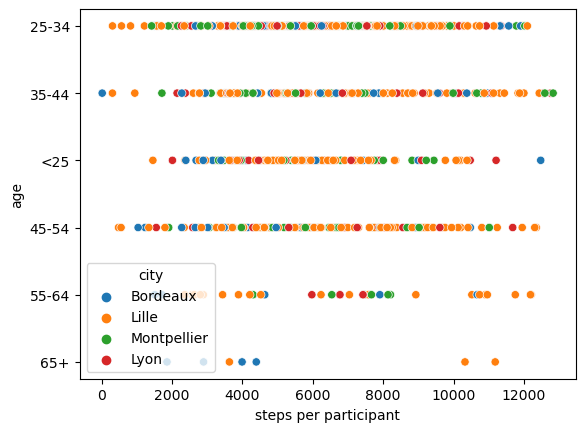

In [9]:
sns.scatterplot(data = df_merge, x=df_merge["steps per participant"], y=df_merge["age"], hue = df_merge["city"])

Er is geen correlatie te zien tussen deze variabelen. Wel is er te zien dat er veel mensen lopen tussen de 25-34 jaar en weinig mensen vanaf 55+

# week opdracht 2

## Exploratory data analysis part 2

Voor het gemak heb ik alle numerieke waarden gepakt

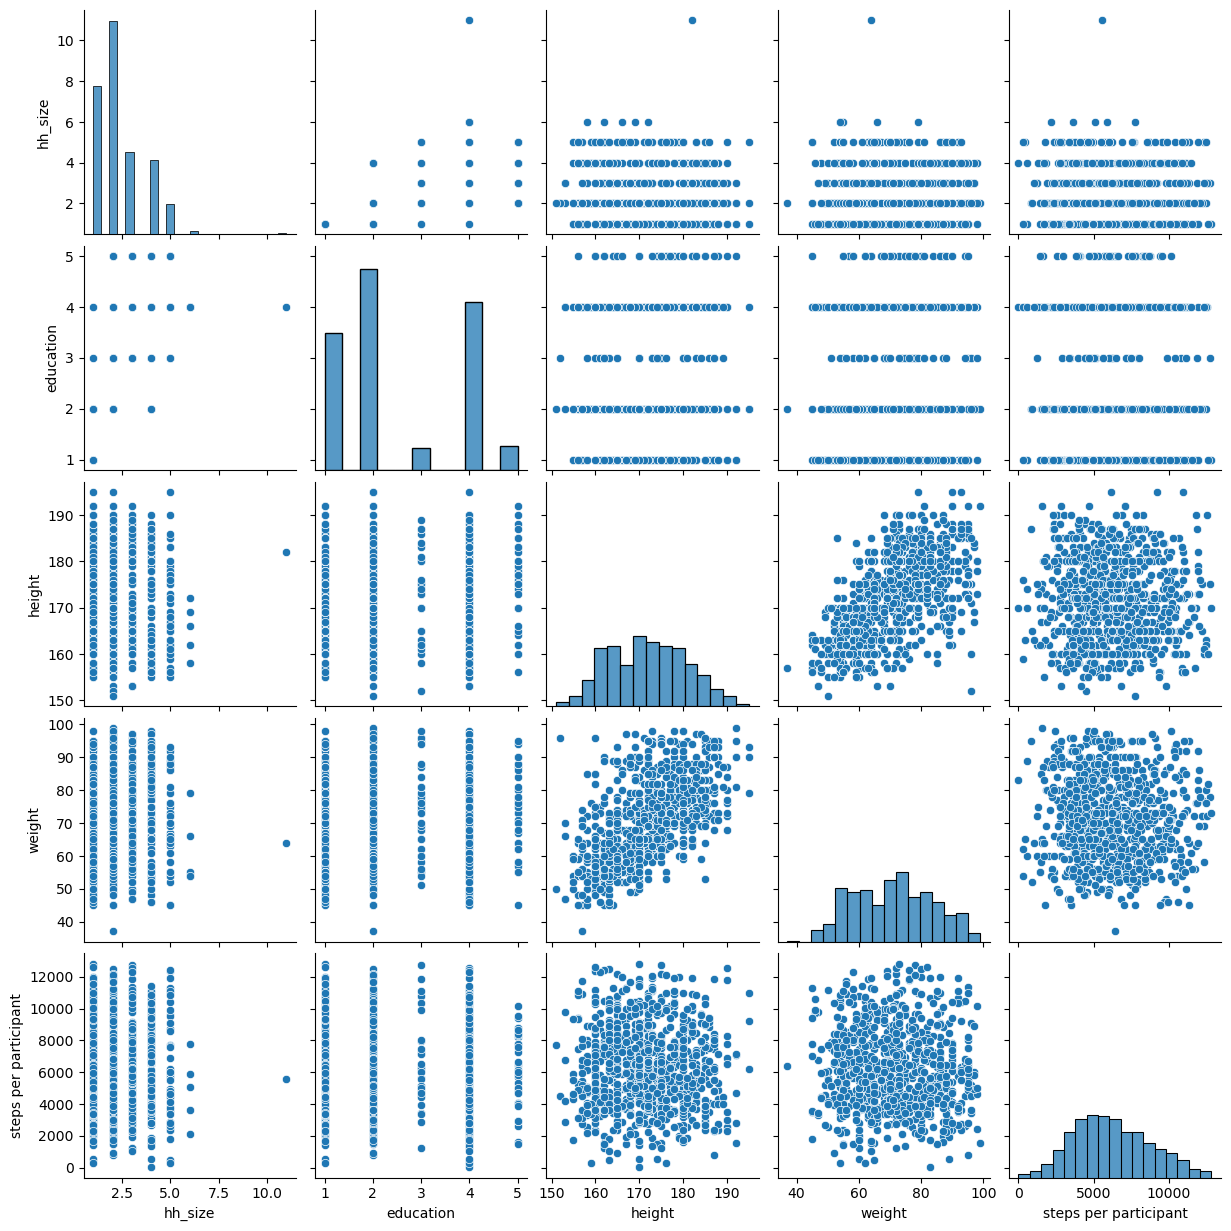

In [10]:
sns.pairplot(df_merge[[ 'hh_size','education','height', 'weight', 'steps per participant' ]])
plt.show() #using Matplotlib to show the plot

In [28]:
corr = df_merge[[ 'hh_size','education','height', 'weight', 'steps per participant']].corr()
corr

,hh_size,education,height,weight,steps per participant
hh_size,1.000000,0.821664,-0.052661,0.018180,0.016447
education,0.821664,1.000000,-0.037693,0.027377,0.005750
height,-0.052661,-0.037693,1.000000,0.609208,-0.004436
weight,0.018180,0.027377,0.609208,1.000000,-0.032607
steps per participant,0.016447,0.005750,-0.004436,-0.032607,1.000000


Er is een sterke correlatie tussen de hh_size en de educatie (0.82). verder is er ook nog een sterke correlatie tussen gewicht en lengte (0.61).
Verder is er geen correlatie tussen andere variabelen, deze waarden zijn namelijk te laag of zijn zelfs negatief

## Predictive model

Linaire regression is een methode om te kijken of er een verband is tussen veriabelen. Tussen deze variabelen wordt er een rechtelijn getrokken om makkelijker te zien of er een linaire verband is of niet.

In [15]:
from sklearn.linear_model import LinearRegression #we need this specific model from sk-learn

x = df_merge[['education', 'education', 'weight', 'height']] 
y = df_merge['steps per participant']
lm = LinearRegression() #this creates a new LR model
lm = lm.fit(x, y) #this "fits" the model

In [16]:
df_merge['steps per particpant_p'] = lm.predict(x) #use built-in predict() method to generate predictions; store in original dataframe
df_merge.head(10)

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,steps per participant,steps per particpant_p
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10144.048193,6044.300660
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5652.756098,6247.618518
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8246.033557,6172.895212
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3460.380952,6171.592032
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5215.636364,6326.076184
5,6,Lille,Male,35-44,1,1,Vocational,170.0,63.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11831.220779,6279.779078
6,7,Montpellier,Male,25-34,2,2,Master or doctorate,175.0,75.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4631.321429,6214.884730
7,8,Bordeaux,Female,25-34,3,4,Master or doctorate,165.0,88.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3533.271186,6048.035020
8,9,Lille,Female,35-44,4,4,Vocational,172.0,69.0,NaN,...,11731.0,14151.0,NaN,3996.0,2556.0,302.0,2442.0,NaN,8551.114035,6284.086666
9,10,Lille,Female,25-34,2,2,Master or doctorate,165.0,93.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3629.666667,5966.928103


## evalution

### R2

In [17]:
from sklearn.metrics import r2_score #we need this function from sklearn
r2_score(df_merge['steps per participant'], df_merge['steps per particpant_p'])

0.0015057288507868138

De R2 is 0.0015 wat betekent dat 0,15% van alle waarden juist zijn 

# RMSE

In [18]:
from sklearn.metrics import mean_squared_error #we need this function from sklearn
from math import sqrt #we need the square root from the math library

sqrt(mean_squared_error(df_merge['steps per participant'], df_merge['steps per particpant_p']))

2554.514558991496

Afwijking van de voorspelling is +/- 2554

# Y-Y plot

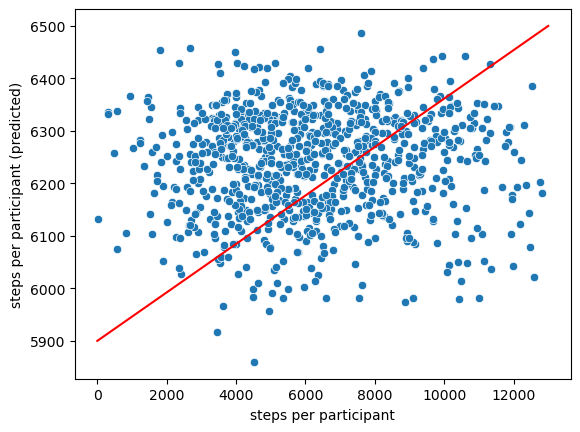

In [27]:
sns.scatterplot(x='steps per participant',y='steps per particpant_p',data=df_merge)
plt.xlabel('steps per participant')
plt.ylabel('steps per participant (predicted)')
plt.plot( [0, 13000], [5900, 6500],color='red' )
plt.show()

Als de voorspellingen goed waren dan zaten alle blauwe punten op de rode lijn, maar zoals te zien is is dat niet zo. Dit kan komen omdat er geen verband is tussen de gemiddelde stappen van iemand met de lengte, gewicht, hh_size of educatie.